# Lecture 9: Tree-based Methods

- [Decision Trees](#Decision-Trees)
    - [Regression Tree](#Regression-Tree)
    - [Classification Tree](#Classification-Tree)
    - [Tree Pruning](#Tree-Pruning)
    
    
- [Tree Ensembles](#Tree-Ensembles)
   - [Bagging](#Bagging)
   - [Random Forest](#Random-Forest)
   - [Boosting](#Boosting)

## Decision Trees

Key Idea: recursive partitioning, recursive binary splitting of the input space . This is a greedy strategy.

### Regression Tree

In [1]:
from sklearn import datasets
from pandas import Series, DataFrame
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
irisX = iris['data']
irisy = iris.target
X0 = irisX[:,0] #Sepal length
X1 = irisX[:,1] #Sepal width
y = irisX[:,3] #Petal width
d = {'Sepal_length':X0, 'Sepal_width':X1}
df = DataFrame(data = d) 
df.head()

,Sepal_length,Sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
testSize = 0.5
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size = testSize,random_state = 0)
fit_rtree = DecisionTreeRegressor(max_depth = 3)#Set depth to 3 for visualization purpose:
fit_rtree.fit(X_train,y_train)
print(fit_rtree)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


In [3]:
from sklearn.tree import export_graphviz
import pydotplus
#First way:
#output the tree structure as a pdf file.
#with open("iris.dot",'w') as f:
    #f = export_graphviz(fit_rtree, out_file=f, feature_names = df.columns)
    #Then use terminal:  "dot -Tpdf iris.dot -o iris.pdf" to generate pdf file.
#http://scikit-learn.org/stable/modules/tree.html#tree

#Second way:
dot_data = export_graphviz(fit_rtree, 
                           out_file = None, 
                           feature_names = df.columns)
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf('iris.pdf')


True

In [4]:
from IPython.display import IFrame
IFrame("iris.pdf", width=900, height=500)


### Or simply

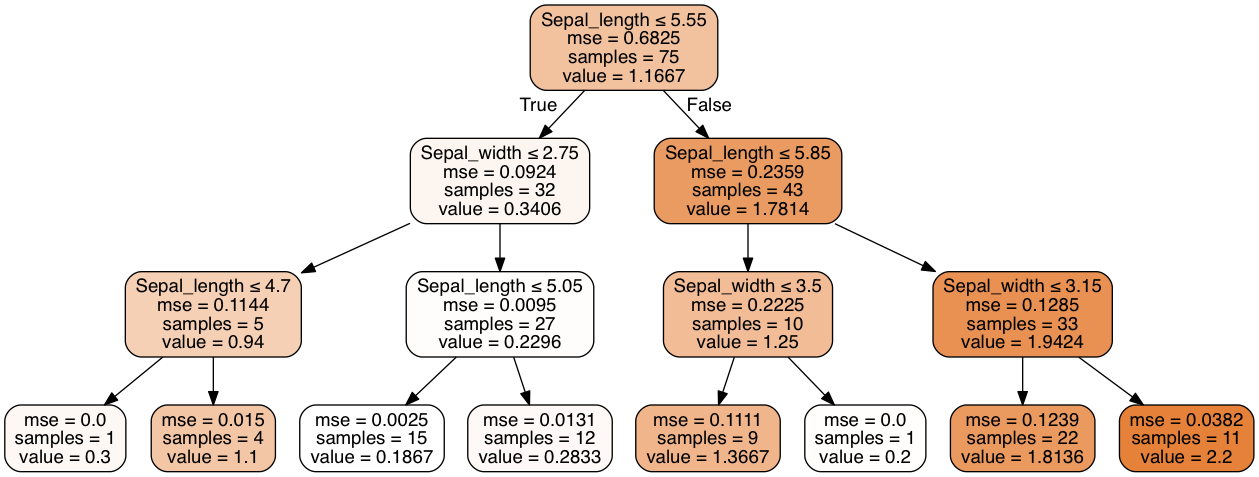

In [5]:
from IPython.display import Image  
import pydotplus
dot_data = export_graphviz(fit_rtree, out_file=None, 
                         feature_names=df.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [6]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from matplotlib.colors import ListedColormap
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))

#This function is used to draw colorful decision regions according to different classifiers
#and data.
def plot_decision_regions(X, y, classifier, test_idx=None, 
                          resolution=0.02, xlabel='', ylabel='', title=''):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max()+1 
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max()+1 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    fig = plt.gcf()
    fig.set_size_inches(8,6)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
   
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

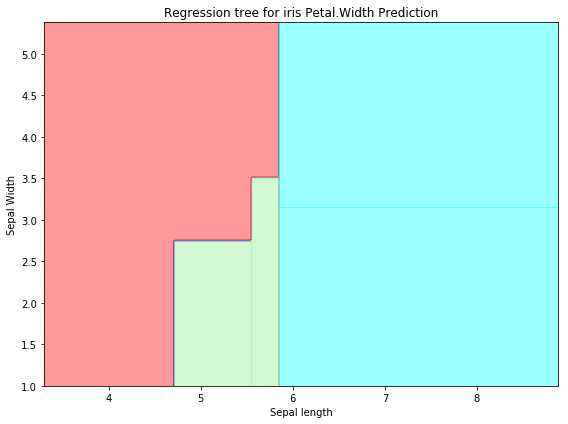

In [7]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

test_idx = range(X_train.shape[0], X_combined.shape[0])
plot_decision_regions(X=X_combined,y=y_combined,
                      classifier = fit_rtree, test_idx=test_idx,
                      xlabel='Sepal length', ylabel='Sepal Width', title='Regression tree for iris Petal.Width Prediction')

### Classification Tree

In [8]:
irisy = iris.target
X2 = irisX[:,2] #Sepal length
X3 = irisX[:,3] #Sepal width
y = irisy #Categorical response
d2 = {'Petal_length':X2, 'Petal_width':X3}
df2 = DataFrame(data = d2) 
df2.head()

,Petal_length,Petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


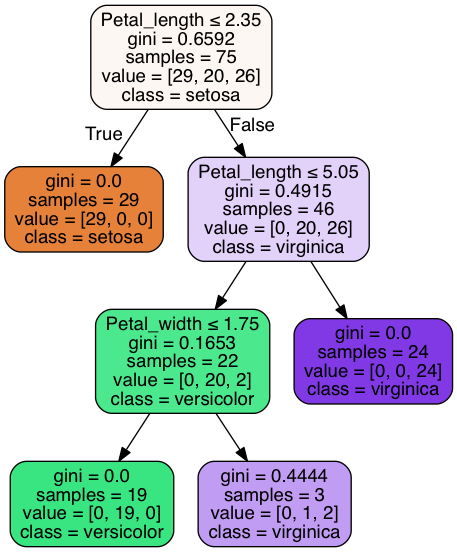

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(max_depth = 3)

testSize = 0.5
X_train,X_test,y_train,y_test = train_test_split(df2,irisy,test_size = testSize,random_state = 0)
clf_tree.fit(X_train,y_train)

dot_data = export_graphviz(clf_tree, out_file=None, 
                         feature_names=df2.columns,
                         class_names = iris.target_names,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 


In [10]:
def plot_decision_regions2(X, y, classifier, test_idx=None, 
                          resolution=0.02, xlabel='', ylabel='', title=''):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max()+1 
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max()+1 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    fig = plt.gcf()
    fig.set_size_inches(8,6)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

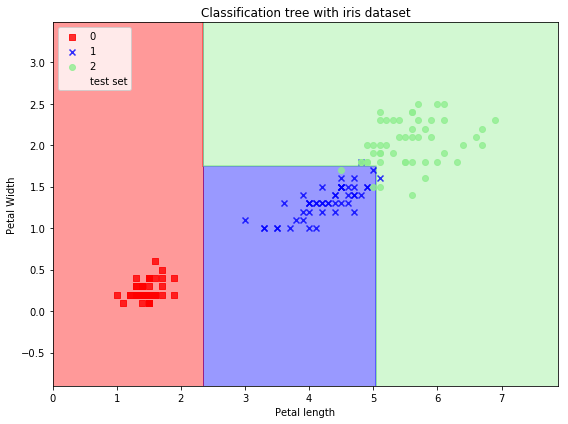

In [11]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

test_idx = range(X_train.shape[0], X_combined.shape[0])
plot_decision_regions2(X=X_combined,y=y_combined,
                      classifier = clf_tree, test_idx=test_idx,
                      xlabel='Petal length', ylabel='Petal Width', title='Classification tree with iris dataset')

### Tree Pruning

In [12]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 200, n_features = 5, n_classes = 2, 
                          n_informative = 3, n_redundant = 2, n_repeated = 0,
                          n_clusters_per_class = 3)
Data = DataFrame(X)
Data.iloc[:,0].name = 'X0'
Data.iloc[:,1].name = 'X1'
Data['class'] = y
Data.describe()

,0,1,2,3,4,class
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,0.025830,-0.066884,0.073435,0.039833,-0.091937,0.49500
std,1.392978,1.533326,1.698359,1.487528,1.408273,0.50123
min,-4.283511,-4.709187,-4.512817,-4.551657,-4.436298,0.00000
25%,-0.899036,-1.199588,-1.000422,-0.979670,-1.076657,0.00000
50%,0.168644,-0.195275,-0.022179,0.107044,-0.198089,0.00000
75%,0.973078,1.053966,1.028866,1.170379,0.936237,1.00000
max,3.414929,3.565812,4.884776,3.814484,3.388913,1.00000


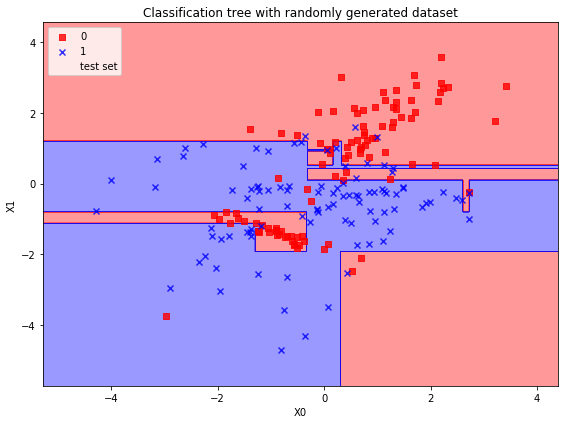

In [13]:
testSize = 0.5
X_train,X_test,y_train,y_test = train_test_split(X[:,0:2],y,test_size = testSize,random_state = 0)
clf_tree2 = DecisionTreeClassifier()
clf_tree2.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

test_idx = range(X_train.shape[0], X_combined.shape[0])
plot_decision_regions2(X=X_combined,y=y_combined,
                      classifier = clf_tree2, test_idx=test_idx,
                      xlabel='X0', ylabel='X1', title='Classification tree with randomly generated dataset')

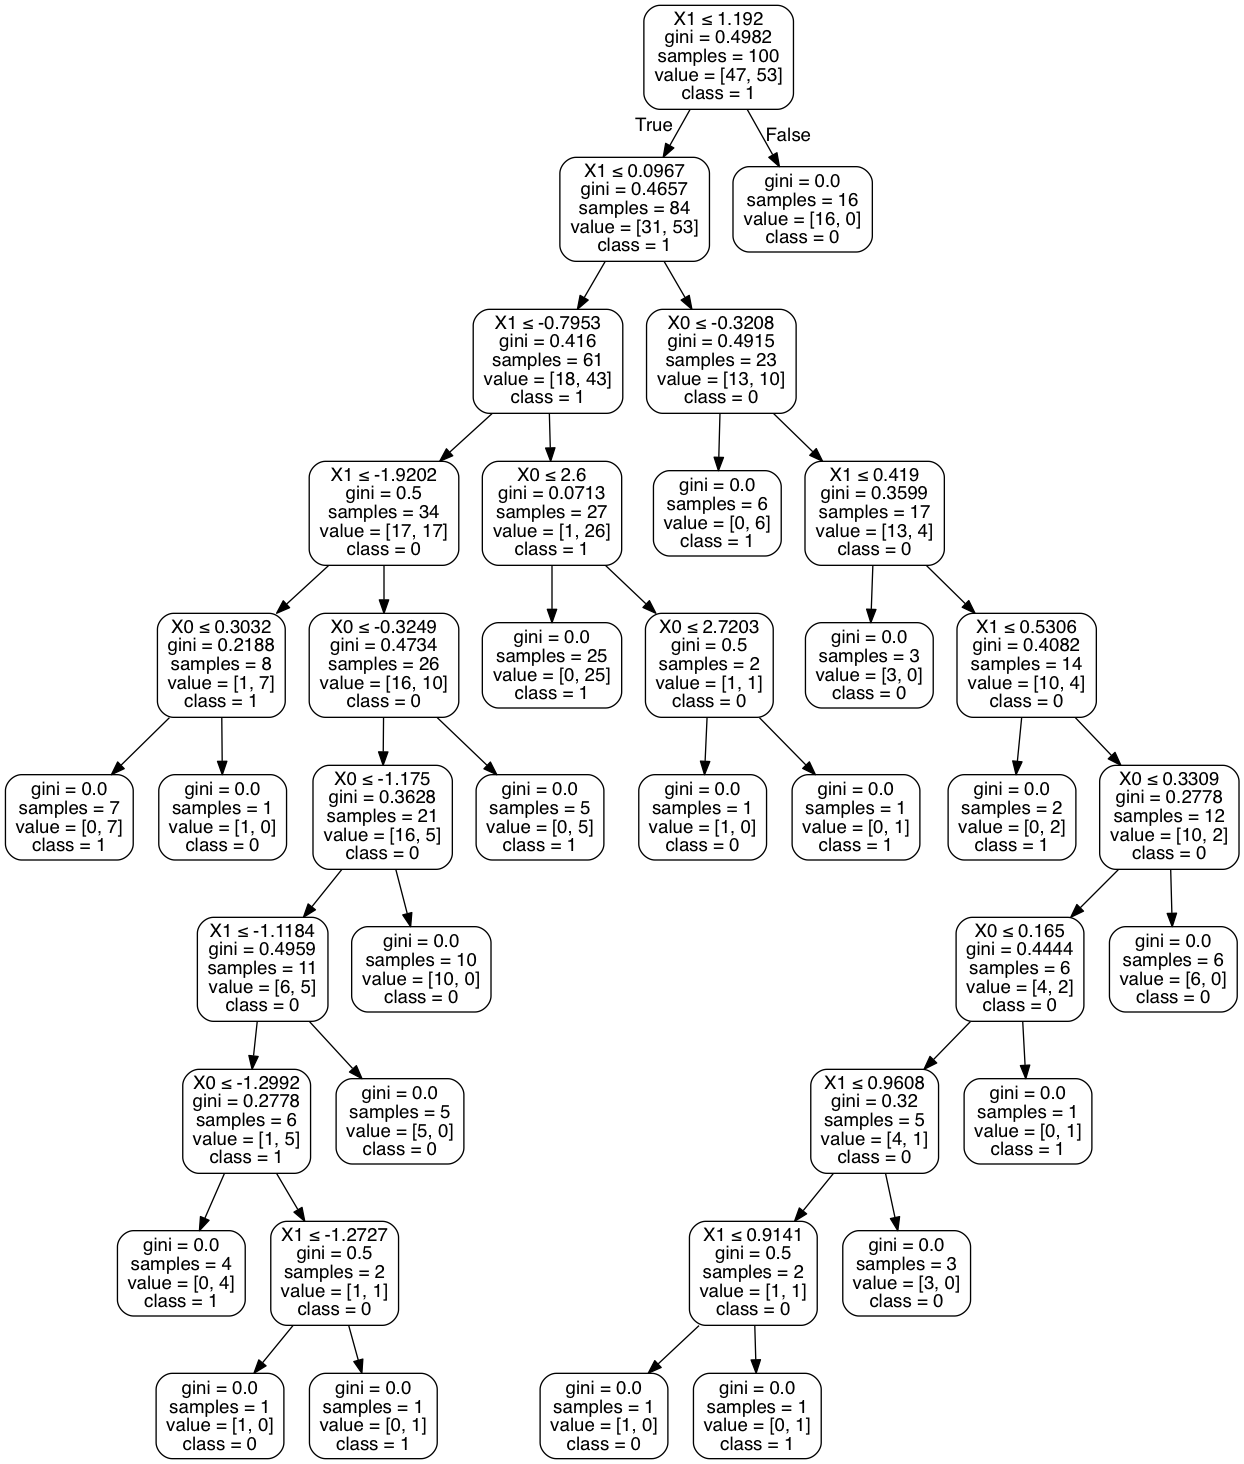

In [14]:
dot_data3 = export_graphviz(clf_tree2, out_file=None, 
                         filled=False, rounded=True,
                         class_names = ['0','1'],
                         special_characters=True)  
graph3 = pydotplus.graph_from_dot_data(dot_data3)  
Image(graph3.create_png()) 

We could see that the above tree structure is too complex. It may result in overfitting problem.

We can use cross-validation to choose tree complexity.


/Users/lihaoyu/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


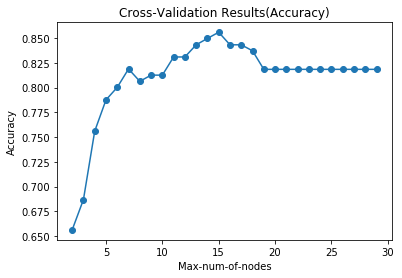

In [15]:
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation
from numpy import linspace
#features = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

x_train_cv,x_test_cv,y_train_cv,y_test_cv = cross_validation.train_test_split(X,y,test_size=0.2,random_state=0)
depth = []
for i in range(2,30):
    clf = DecisionTreeClassifier(max_leaf_nodes=i)
    scores = cross_val_score(estimator=clf, X=x_train_cv, y=y_train_cv, cv=5, n_jobs=4)
    depth.append(scores.mean())
#print(depth)
plt.plot(linspace(2,len(depth)+1,len(depth)), depth, marker = 'o',linestyle = '-')
plt.xlabel('Max-num-of-nodes')
plt.ylabel('Accuracy')
plt.title("Cross-Validation Results(Accuracy)")
plt.show()

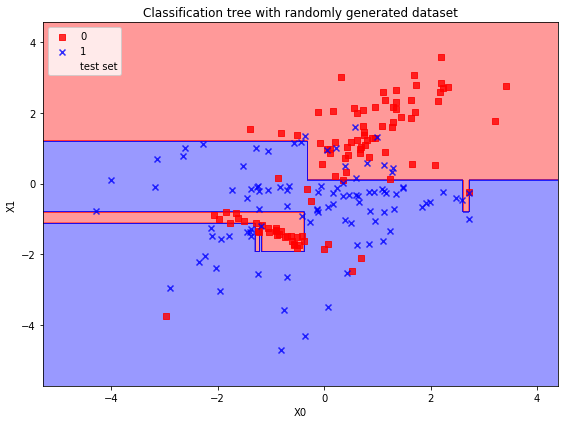

In [16]:
clf_tree_cv = DecisionTreeClassifier(max_leaf_nodes = 15)
clf_tree_cv.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

test_idx = range(X_train.shape[0], X_combined.shape[0])
plot_decision_regions2(X=X_combined,y=y_combined,
                      classifier = clf_tree_cv, test_idx=test_idx,
                      xlabel='X0', ylabel='X1', title='Classification tree with randomly generated dataset')

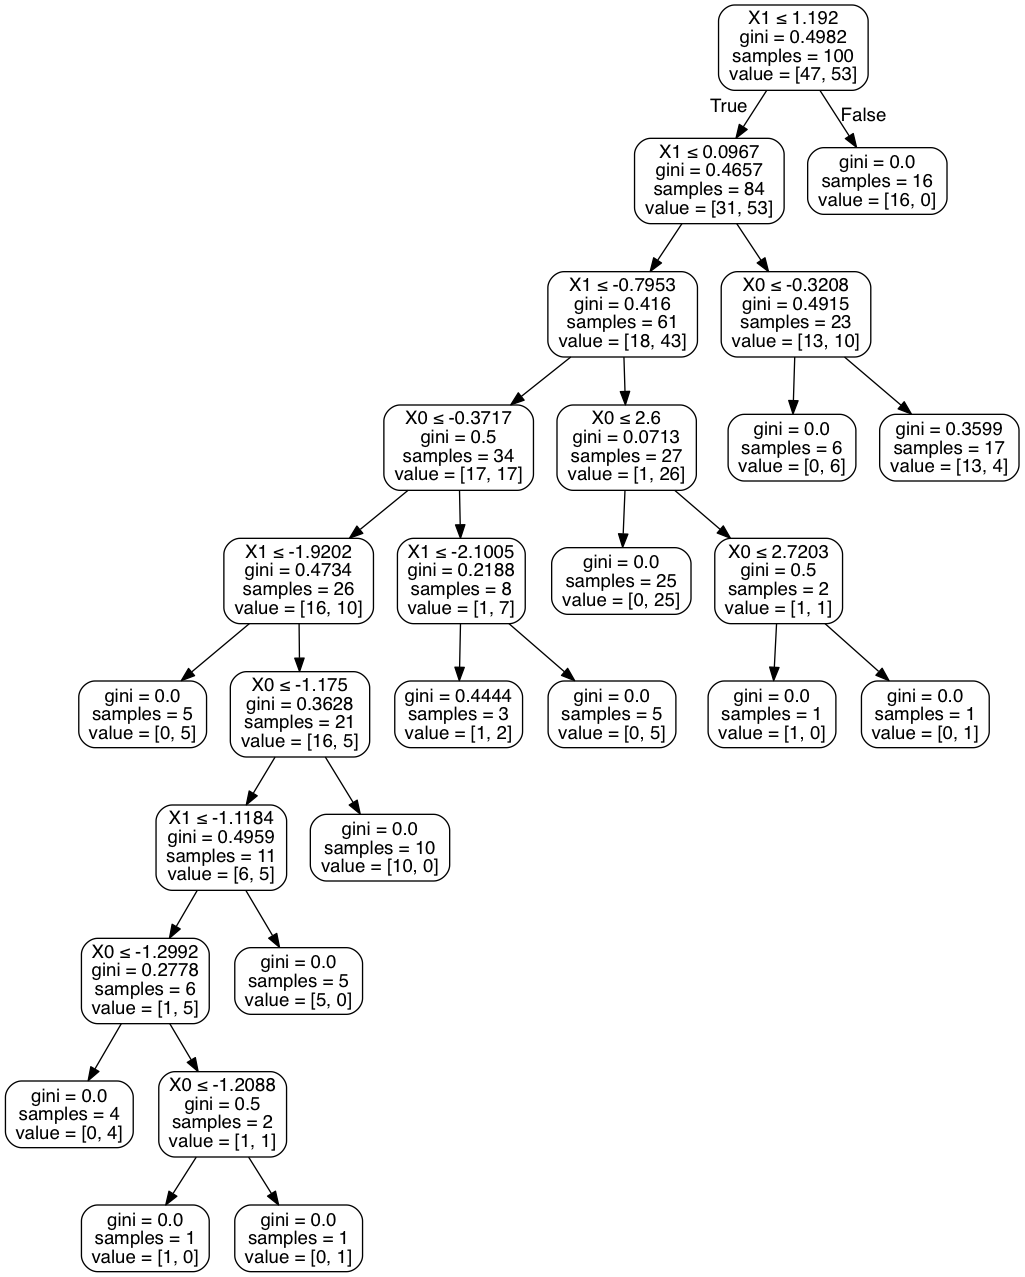

In [17]:
dot_data_cv = export_graphviz(clf_tree_cv, out_file=None, 
                         filled=False, rounded=True,  
                         special_characters=True)  
graph_cv = pydotplus.graph_from_dot_data(dot_data_cv)  
Image(graph_cv.create_png()) 

## Tree Ensembles

Tree-based ensembe learners use trees as building blocks to construct powerful prediction models. The key is to get 

rid of the variance by averaging.

### Bagging

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)


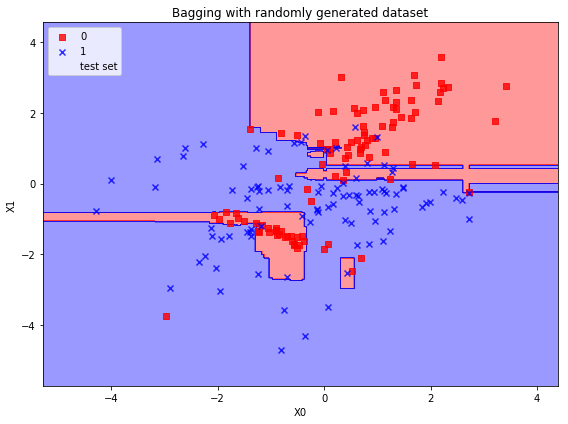

In [18]:
from sklearn.ensemble import BaggingClassifier
fit_bag = BaggingClassifier(n_estimators = 300,bootstrap = True)
fit_bag.fit(X_train,y_train)
print(fit_bag)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

test_idx = range(X_train.shape[0], X_combined.shape[0])
plot_decision_regions2(X=X_combined,y=y_combined,
                      classifier = fit_bag, test_idx=test_idx,
                      xlabel='X0', ylabel='X1', title='Bagging with randomly generated dataset')

### Random Forest

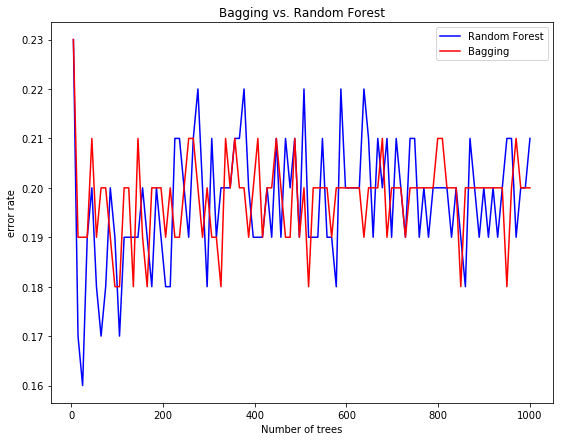

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 300,criterion = 'gini',max_leaf_nodes = 14)
fit_bag = BaggingClassifier(n_estimators = 300,bootstrap = True)
numOfTrees = linspace(5,1000,100)
rf_err = []
bag_err = []
for num in numOfTrees:
    rf = RandomForestClassifier(n_estimators = int(num),criterion = 'gini')
    rf.fit(X_train,y_train)
    rf_err.append(1-rf.score(X_test,y_test))
    
    fit_bag = BaggingClassifier(n_estimators = int(num),bootstrap = True)
    fit_bag.fit(X_train,y_train)
    bag_err.append(1-fit_bag.score(X_test,y_test))
    
fig = plt.figure()
fig.set_size_inches(9,7)
plt.plot(numOfTrees,rf_err,color = 'b',linestyle = '-',label = 'Random Forest')
plt.plot(numOfTrees,bag_err,color = 'r',linestyle = '-',label = 'Bagging')
plt.legend(loc = 'best')
plt.xlabel("Number of trees")
plt.ylabel("error rate")
plt.title("Bagging vs. Random Forest")
plt.show()


### Boosting

As we know, there exist different versions of boosting algorithms for regression and classification.

Here we use python to illustrate the popular boosting algorithm :"AdaBoost", introduced in 1995 by Freund and Schapire 
[FS1995].

<img src = "https://image.slidesharecdn.com/adaboost-150828071337-lva1-app6892/95/ada-boost-5-638.jpg?cb=1440746374">
<img src = "http://payload126.cargocollective.com/1/9/299269/4826958/adaboost8_905.jpg">
<img src = "http://datamining.togaware.com/survivor/img98.png">



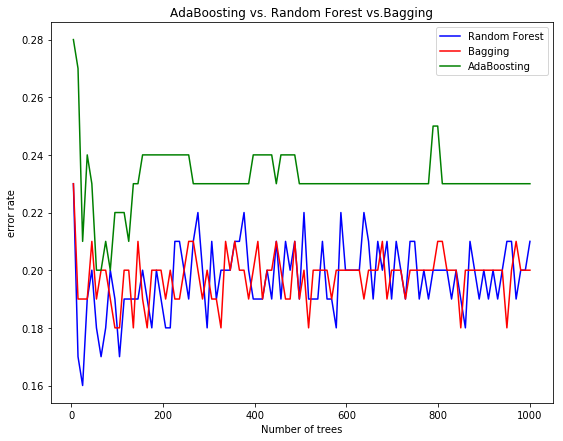

In [21]:
from sklearn.ensemble import AdaBoostClassifier

ada_err = []
for num in numOfTrees:   
    ada = AdaBoostClassifier(n_estimators = int(num), learning_rate = 0.9)
    ada.fit(X_train,y_train)
    ada_err.append(1-ada.score(X_test,y_test))
    
fig = plt.figure()
fig.set_size_inches(9,7)
plt.plot(numOfTrees,rf_err,color = 'b',linestyle = '-',label = 'Random Forest')
plt.plot(numOfTrees,bag_err,color = 'r',linestyle = '-',label = 'Bagging')
plt.plot(numOfTrees,ada_err,color = 'g',linestyle = '-',label = 'AdaBoosting')
plt.legend(loc = 'best')
plt.xlabel("Number of trees")
plt.ylabel("error rate")
plt.title("AdaBoosting vs. Random Forest vs.Bagging")
plt.show()

